# What makes Python popular

* Relatively easy to read (white space instead of punctuation)

* Object-oriented programming is built in to every aspect of Python (more on this soon)

* A strong "front end" language -- useful for calculations, scientific inference and interpreting results, but can quickly become inefficient for hefty numerical tasks (like hydrodynamical simulations). For numerically intensive projects, good coding choices are required, and you may need to use special libraries that assist Python with speed (e.g., cython, numba).

* A large number of users with strong open source communities -- leading to a proliferation of widely useful packages (numpy, scipy, scikit, pytorch, pandas, seaborn, astropy, pymc3)

# 1. Built-in Python objects

## 1.1 Floats and Integers

Python numbers can be integers (whole numbers) or floats (numbers with decimals).

You can always check the type of your number by using the `type()` function.

In [1]:
type(1)

int

In [2]:
type(1.)

float

You can also define floats with scientific notation, using the character `e`. Any number defined in this way will be stored as a float, even if you don't use a decimal.

In [3]:
type(1e3)

float

float

Dividing two integers always returns a float.

In [4]:
4/2

2.0

In [ ]:
type(4/2)

If you want the integer result from a division, use this special notation.

In [6]:
4//2

2

In [7]:
type(4//2)

int

The available range of values depends on the amount of space used to store the number. Most machines these days are "64-bit", meaning that, by default, numbers receive 64 bits of storage. Bits take on the value "0" or "1", and describe the value of a number using base 2 notation (e.g., 00 = 0, 01 = 1, 10 = 2, 11 = 3) So if we only had 8-bits available to store the value of an integer, the maximum value we could store is (2^8 - 1) = 255.

Python hides a lot of these details from users. [Python changes the amount of storage space that is taken up by an integer, depending on the value.](https://www.pythontutorial.net/advanced-python/python-integers/) So it will take one bit to store the value 0 or 1, two bits to store the values 3 or 4, and so on. For values larger than 2^64-1, Python will do the book-keeping to store each index of the integer separately. So there is no limit to the integer value you can use in Python. To do this, Python integers are actually objects! (More on what this means soon)

In [8]:
type(-1000)

int

In [9]:
type(999999999999999999999999999999999999999999999)

int

![How floats are stored in computer memory - from log2base2.com]
(https://www.log2base2.com/images/storage/how-float-values-are-stored-in-memory.png)

Python floats are what C programmers call "doubles", which are 64-bit representations of signed numbers in scientific notation. 1 bit stores the sign (+ or -), 11 bits store the value of the exponent in scientific notation, and 52 bits store the value before the exponent. This means that the largest value that can be stored is on the order of 10^((2^10) - 1) = 10^1023

Let's see what happens when we try to create a float with a value larger than this.

In [10]:
1.e1024

inf

And here we get to something unique about Python -- the ability to natively represent and handle abstract mathematical concepts such as infinity. Adding, subtracting, multiplying or dividing anything by infinity gives infinity. You are also able to define infinity as being positive or negative.

In [11]:
1.e1024 + 1.

inf

In [12]:
-1.e1024

-inf

## 1.2 More native Python objects

As described in some of the details of integers and floats, above, we see that Python is doing a lot of work in the background (back-end) to provide a seamless user experience (front-end). This is because Python is inherently object-oriented -- every value you create in Python is an "object" that has special rules governing how they interact with other objects. 

Integers and floats are `int` and `float` type objects, as described above. Some other very useful Python objects are strings, lists and dictionaries.

### Strings

Python strings are non-mathematical collections of alpha-numeric characters. They can be defined with single or double quotation marks. Like numbers, string objects have rules for addition and multiplication.

In [13]:
type('a'), type("bc")

(str, str)

In [14]:
'a' + 'bc'

'abc'

In [15]:
'abc' * 3

'abcabcabc'

There is a wide variety of operations one can perform on Python strings, which we don't have time to cover in this workshop! See the resources list at the end of this section for links to tutorial sites that cover Python strings,  other Python objects noted in this tutorial, and more Python objects not covered.

### Dictionaries + logic statements, print formatting, and zip

Dictionaries are sets of key-value pairs. I find them handy when I am working with multiple datasets of the same general type, because I can assign each a label and then perform operations on them in sequence.

Dictionary keys and values can be *any* type of Python object. You can use curly brackets to initiate a dictionary, where key-value pairs are separated by a colon.

In [17]:
my_dictionary = {'a':1, 'b':2, 'c':3, -1:'do re mi'}

for k in my_dictionary.keys():
    print(k, ':', my_dictionary[k])

a : 1
b : 2
c : 3
-1 : do re mi


Here is a logic statement that will test if a desired label is in my dictionary. Logic statements return a boolean Python object (bool), that is `True` or `False`.

In [18]:
print( 'a' in my_dictionary.keys() )

True


In [19]:
print( 10 in my_dictionary.keys() )

False


We can use `if` and `else` statements to do something with a logic test. Note the special syntax I am using to insert the test value into a string.

In [20]:
my_test_key = 'd'

if my_test_key in my_dictionary.keys():
    print("{} is in my_dictionary".format(my_test_key))
else:
    print("Key not found")

Key not found


**Exercise**: Change the code above to make the logic test pass.

**Efficiency tip:** You can make a dictionary very quickly using the `zip` function in Python. Zip pairs objects one-for-one in the order they are specified. I find this useful for assigning information to labels that I will use over and over again.

In [21]:
labels = ['A', 'B', 'C']
filenames = ['dataset_A.txt', 'dataset_B.txt', 'dataset_C.txt']
colors = ['red', 'cyan', 'magenta']

data_files = dict(zip(labels, filenames))
plot_colors = dict(zip(labels, colors))

for k in labels:
    print("{} will be plotted in {}".format(data_files[k], plot_colors[k]))

dataset_A.txt will be plotted in red
dataset_B.txt will be plotted in cyan
dataset_C.txt will be plotted in magenta


### Lists

Lists are a sequence of objects. They don't have to be the same type of object -- Python doesn't care! The sequence is iterable, meaning that we can use a Python `for` loop to perform on operation on the sequence one-by-one.

In [22]:
x = [1, 2, 3., 'a', 'b', 'c']

for obj in x:
    print(type(obj), ":", obj)

<class 'int'> : 1
<class 'int'> : 2
<class 'float'> : 3.0
<class 'str'> : a
<class 'str'> : b
<class 'str'> : c


It's important to note that you cannot perform math on Python lists! **The rules governing Python lists are entirely different from an array of numbers.** See the following cells, for example.

In [23]:
x = [1, 1, 1]
y = [1, 2, 3]
print(x + y)

[1, 1, 1, 1, 2, 3]


In [24]:
x = [1, 2, 3]
print(2 * x)

[1, 2, 3, 1, 2, 3]


Instead of adding or multiplying the values within each list of numbers, Python lists get concatenated with the `+` command or repeated by the specified number of times with the `*` command. In that way, Python lists act like strings, not arrays of numbers.

If you are coming from a background where you mostly use Matlab or IDL for calculations, this can be a source of annoyance. We will have to use an external library, [**Numpy**](https://numpy.org/), to create numerical arrays. It takes a little bit more typing to create arrays of numbers, but you get a whole library of useful (and optimized) methods for doing mathematical operations on multi-dimensional arrays.

## More resources for introductory Python

* [Python.org: An Informal Introduction to Python](https://docs.python.org/3/tutorial/introduction.html)

* [Programmiz: Python Datatypes](https://www.programiz.com/python-programming/numbers)

* [Tutorialspoint: Python Strings](https://www.tutorialspoint.com/python/python_strings.htm) -- describes string formating, special chracters, and Python's built-in library for manipulating strings

* [RealPython.org: When to Use a List Comprehension in Python](https://realpython.com/list-comprehension-python/) -- a fast way to build lists in one line, which occasionally comes in handy

# 2. Name spaces

Now we are ready to access our first external Python library -- Numpy! Before doing so, let's talk about namespaces and all of the different ways you can import your code into your Python working environment.

**What is a namespace?** 

A namespace is a "collection of currently defined symbolic names along with information about the object that each name references"\[1\]. You can think of it as all of the variable names defined for your current Python environment. When you open Python in your terminal or start a Jupyter Notebook, there are a large number of built-in functions and variables that are already defined by default. This is called the "built-in" namespace, and you can see what's there by printing `dir(__builtins__)`

## 2.1 Importing a library

You can bring a new Python library into the namespace by using the `import` command. For instance, `import astropy` will load the entire Astropy library into your current working environment.

In [25]:
import astropy

# Here I am using the Astropy constants package to print the mass of the Earth in grams, 
# using scientific notation with 1 decimal place, using the format string notation {:.1e}
earth_mass = astropy.constants.M_earth
print("Earth mass = ", earth_mass.to('g'))

AttributeError: module 'astropy' has no attribute 'constants'

## 2.2 Importing specific modules or functions from a library

In the above example, I imported an *entire* package library just to get at the values stored in one module (constants). If I don't need anything but that package, I can import that module only.

In [26]:
from astropy import constants

earth_mass = constants.M_earth
print("Earth mass = ", earth_mass.to('g'))

Earth mass =  5.972167867791379e+27 g


## 2.3 Creating an alias

If it's package that I use a lot, and I want to make my code easier to read, I might choose to give that package a short nickname -- called an **alias**. 

Using an alias doesn't change the properties of the package you imported.

In [27]:
import astropy.constants as c

earth_mass = c.M_earth
print("Earth mass = ", earth_mass.to('g'))

Earth mass =  5.972167867791379e+27 g


Just be careful not to accidentally write over that name by defining `c` to be something else, later on!

In [28]:
c = 1.e5 # speed of light, in km/s

earth_mass_energy = c.M_earth * c**2 # Mass energy of the Earth, according to E = mc^2

AttributeError: 'float' object has no attribute 'M_earth'

Some aliases are so frequently used that they have become a standard practice. For numpy, `np` is the most common alias you will see.

In [1]:
import numpy as np

Now I am ready to start performing math on arrays of numbers! I will use "np" as short-hand for numpy throughout my code and in this notebook.

## Resources

\[1\] [RealPython.com: Namespaces and Scope](https://realpython.com/python-namespaces-scope/) -- includes examples for how variable names get treated when they are inside and outside of functions

# 3. Math with numpy

## 3.1 Defining numerical arrays

To define an array of numbers, use `np.array`, then define the values of your array inside square brackets.

In the example below, multiplying my array by 2 applies this operation to each element of the array. Compare this to the behavior of multiplying lists by an integer number, above.

In [2]:
my_array = np.array([1., 2., 3.])
print(my_array * 2)

[2. 4. 6.]


If you started programming in Fortran or C, you might be used to building and filling numerical arrays by looping over every index. This type of operation is *highly inefficient* in Python, and can cause a lot of headaches for people who are trying to make the switch.

Python for-loops are inefficient because of the interpreted, object-oriented nature of the language. At each step in the loop, Python is performing type-checks and other hidden processes that make it significantly slower than compiled languages like Fortran or C.

Fortunately, numpy is optimized to perform common mathematical operations as fast as possible. So there are a lot of built in numerical functions that eliminate the need for mathematical for-loops in Python. If some one tells you to "vectorize" your code, they are telling you to replace your for-loops with numpy arrays and apply numpy functions to those arrays.

Here is a simple example of initializing an array of ones using the for-loop versus the numpy approach. I will measure the efficiency of my code using the IPython magic command, `%%timeit`, which measures the average time it takes to execute the code in that block.

In [3]:
N = 100 # length of array I want to build

In [4]:
%%timeit

# Method 1: Create an empty list, append the value 1 to that list N times, then convert the list to a numpy array
list_array = []
for i in range(N):
    list_array.append(1.0)

result = np.array(list_array)

17.4 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit

# Method 2: Create a numpy array of zeros, then loop through each element to set it to the value I want, which is 1
result = np.zeros(N)
for i in range(len(result)):
    result[i] = 1.0

19 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit

# Method 3: Use the numpy function `ones` to create an array where each element is set to 1
result = np.ones(N)

3.25 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Depending on your machine and/or numpy and python versions, you'll see that using the built-in numpy function `np.ones` is 3-6 times faster than using a for-loop to set all of the values of an array to 1.

**Exercise:** Use `%%timeit` to test the efficiency of calculating the mathematical quantity $n! = n \times (n-1) \times (n-2) ... \times 1$ using a for-loop versus using a numpy array.

The numpy factorial function is `np.math.factorial`. You might also take advantage of built-in Python object `range` or the function `np.arange` to create your for-loop. Which one yields a faster for-loop?

### Resources

* [Jake VanderPlas: Why Python is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/) -- for a deep dive into Python inefficiencies
* [IPython documentation: Built-in magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) -- search this for the %timeit command, and other useful IPython "magic"

## 3.2 Indexing and slicing multi-dimensonal numpy arrays

Note that Python indexes values starting from 0, so x[0] gives you the first element of array x, x[1] gives the second value, and so on.

In [7]:
count_to_ten = np.arange(10) # array of whole number values, 0-9
print(count_to_ten)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
count_to_ten[0]

0

In [9]:
count_to_ten[1]

1

You can select a sub-section of a numpy array with bracket notation, called a "slice". A slice is defined by three values: starting index, ending index, and step size.

In the following example, I select even numbers between 10 and 20 using an array of whole number values from 0 to 99.

In [10]:
count_to_onehundred = np.arange(100) # array of whole number values, 0-99
print(count_to_onehundred[10:20:2])

[10 12 14 16 18]


Note from the example above that the starting index is included, but the ending index does not. Let's see that in practice, again. This time, I am going to leave the start index empty, indicating that I want to see everything *up to but not including* index 10 in the array.

In [11]:
print(count_to_onehundred[:10])

[0 1 2 3 4 5 6 7 8 9]


There are instances where you may care about what is happening at the end of your array. For convenience, Python allows you to index from the end-point of the array using negative numbers.

In [12]:
print(count_to_onehundred[-1]) # returns the last index of the array

99


In [13]:
print(count_to_onehundred[-10:]) # returns the last 10 values of the array

[90 91 92 93 94 95 96 97 98 99]


You can create multi-dimensional arrays by nesting lists in brackets. Here is an example of creating a 2-D array by hand in numpy.

In [14]:
example_2d = np.array([[1, 1, 1],
                       [2, 2, 2],
                       [3, 3, 3],
                       [4, 4, 4]])

We can view the dimensions of the array using the `shape` attribute.

In [15]:
print(example_2d.shape)

(4, 3)


With the print statement above, we can see that the array has dimensions 4x3 so that the first (0th) dimension has length 4 and the second (1st) dimension has length 3.

What happens if we print the length of the array?

In [16]:
print(len(example_2d))

4


We only see the length of the first (0th) dimension! This is something to watch out for.

Now, let's say I want to do something with a single row of the array. I can use the same indexing and slicing notation as I did with the 1-D array, but I can index each dimension individually, using a comma to separate my slices.

In [17]:
# Print the first item (column 0) in the second row (row 1)
print(example_2d[1,0])

2


In [18]:
# Print the first row
print(example_2d[0,:])

[1 1 1]


In [19]:
# Print the first column
print(example_2d[:,0])

[1 2 3 4]


In [20]:
# Print everything except the first row
print(example_2d[1:,:])

[[2 2 2]
 [3 3 3]
 [4 4 4]]


## 3.3 Filtering arrays

I have noticed a lot of people coming to Python from IDL naturally find the `np.where` function and use it liberally to filter arrays. Note that it returns the array where the logic condition is met. [See the `np.where`  documentation](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to understand the full power of this function.

In [21]:
np.where(count_to_onehundred >= 50)

(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

Note that the above function call returns two values: the filtered numpy array, followed by nothing (which in Python, is the object `None`). So if we only wanted the filtered array, we would need to store it like this:

In [22]:
filtered_array = np.where(count_to_onehundred >= 50)[0]
print(filtered_array)

[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


If you have multiple arrays, such as 1-D x and y values for a graph, and you want to filter the information based on the values in x, my personal preference is to create boolean arrays. These are arrays of True/False values that you can apply to numpy arrays in the same way you would with slices.

In [23]:
# Filter for the numbers between 20 and 30, inclusive
ii = (count_to_onehundred >= 20) & (count_to_onehundred <= 30)
print(ii)
print(count_to_onehundred[ii])

[False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[20 21 22 23 24 25 26 27 28 29 30]


**Exercise:** Filter the `count_to_onehundred` array to print values between 20 and 30, inclusive, using `np.where`

**Exercise:** Filter the `count_to_onehundred` array to print values > 50, without saving the boolean array to a new variable name.

**Exercise:** Which technique is fastest?

## 3.4 Useful numpy functions

Numpy is full of useful functions that can help you avoid for-loops. Let's look at something simple, like summing data with `np.sum`, operating on the 2D array I created earlier.

As a reminder, the array looks like this:

In [24]:
print(example_2d)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


Here's what happens when I run `np.sum` on this array:

In [25]:
print(np.sum(example_2d))

30


But what if I didn't want the sum of the *entire* array. What if I wanted the sum of all the columns?

We can tell `np.sum` to perform the summation over one axis and not the other using the `axis=` keyword. In our case, the columns are the 0th axis and the rows are the 1st axis. (Remember: Python starts indexing at 0)

In [26]:
print(np.sum(example_2d, axis=0))

[10 10 10]


**Exercise:** How would you use `np.sum` to sum over the rows, instead of columns? What is the shape of the result?

**Exercise:** How would you write a for-loop to sum over the columns of the `example_2d` array? Use %%timeit to see which is faster, `np.sum` or your for-loop.

### A list of useful numpy functions (that I use all the time)

* Special constants: `np.pi`, `np.inf`, `np.e`
* Special arrays: `np.arange`, `np.linspace`, `np.logspace` for setting up grids
* Math: `np.exp`, `np.sum`, `np.log` (natural log), `np.log10` (base-10 log)
* Statistical properties of an array: `np.mean`, `np.std`, `np.percentile`
* A simple interpolator: `np.interp`
* Building and working with histograms: `np.histogram`, `np.histogram2d`
* Numerical integration: `np.trapz` (trapezoidal method)

**Scipy provides libraries of more advanced operations for scientific computing. Check out:**

* [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html)
* [scipy.integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)


The easiest way to look up Numpy and Scipy documentation is to search using the same notation you would use to call the function in Python. For example, the first thing that pops up on Google when I search "numpy.trapz" is [https://numpy.org/doc/stable/reference/generated/numpy.trapz.html](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html).

# 4. Defining functions with docstrings

Here we'll review how to write functions in Python, with a highlight on docstrings!

Anything after a "#" symbol in Python will be ignored, allowing you to create an inline comment. But you can comment out large blocks of text beginning and ending with a triple quote symbol, either ''' or """

A block of comment text just after a function definition is referred to as a "docstring", and it has become a software engineering standard to provide Python documentation in this way.

Here, I'm going to define a function that computes a the Taylor expansion for an exponential function up to order `n`, then plots the approximations alongside the true function.

In [27]:
# For plotting, I will use matplotlib
import matplotlib.pyplot as plt

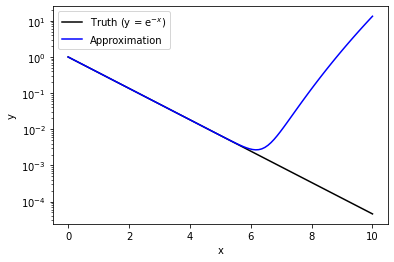

In [34]:
# define a linear grid with 100 steps between 0 and 100, inclusive
XGRID = np.linspace(0, 10, 100)

def taylor_expand_exponential(n):
    """
    Compute the Taylor expansion approximation to an exponential function, y = exp(-x),
    and plot the approximation against the true function.
    
    Inputs
    ------
    n : int : highest order term to compute in the Taylor expansion
    
    Returns
    -------
    numpy array with the Taylor expansion approximation: 
    y_approx = 1 - x + x^2/2! - x^3/3! + ...
    
    This function also draws a plot.
    """
    # Note that I am using XGRID, which has been defined externally from this function
    y = np.exp(-XGRID)
    
    y_approx = 0.0
    for i in range(n+1): # i takes on values 0, 1, 2, ..., n
        y_approx += (-1.0)**i * XGRID**i / np.math.factorial(i)
    
    plt.plot(XGRID, y, color='k', label='Truth (y = e$^{-x}$)')
    plt.plot(XGRID, y_approx, color='b', label='Approximation')
    plt.semilogy()
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    return y_approx

# Test it
test = taylor_expand_exponential(20)

## 4.1 Why docstrings are so great!

Great! Our code works. Now we can use the "?" notation in IPython to read our own documentation from the Jupyter notebook.

Using one "?" shows you the docstring

In [39]:
taylor_expand_exponential?

and using two "??" shows you the source code

In [40]:
taylor_expand_exponential??

This is just one demonstration of automated processes for digesting docstrings, which are part of the Python standard practice. They aren't just readable by Python, **docstrings are used to build entire ecosystems of online documentation**.

Compare the docstring for `np.sum` with the online documentation: [https://numpy.org/doc/stable/reference/generated/numpy.sum.html](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

Notice that ALL the text on the documentation page is also contained in the docstring. That's because Numpy uses the [Sphinx architecture](https://www.sphinx-doc.org/en/master/) to generate its online documentation from docstrings!

In [43]:
np.sum?

Getting in the habit of writing docstrings will not only benefit future you, it can eventually help your code libraries grow because new users will understand your code faster -- making it more desirable to use, enhancing your citations, and your collaboration potential.

## 4.2 Keyword arguments in function definitions

Let's get back to function definitions and a few tricks you can use to make your functions more flexible and reusable.

Note that in the above example, my function uses the hard-coded `XGRID` values that I defined externally. I may know from the beginning that this is the default grid I want to use, but what if I change my mind later? Or what if I need to change it just for the sake of testing my code? If that were the case, I would have to go back and run everything from the top.

Using keywords in my function definitions, I can set up a default value to use, which I can change later.

In [73]:
def taylor_expand_exponential(n, x=XGRID):
    """
    Compute the Taylor expansion approximation to an exponential function, y = exp(-x),
    and plot the approximation against the true function.
    
    Inputs
    ------
    n : int : highest order term to compute in the Taylor expansion
    
    x : numpy array : grid of x values for the function input
    
    Returns
    -------
    numpy array with the Taylor expansion approximation: 
    y_approx = 1 - x + x^2/2! - x^3/3! + ...
    
    This function also draws a plot.
    """
    # This time I am not using any external variables.
    # By default, it uses the XGRID I defined earlier on in the notebook,
    # but this can be changed if the user sets x= to something else
    # when they run the function.
    y = np.exp(-x)
    
    y_approx = 0.0
    for i in range(n+1): # i takes on values 0, 1, 2, ..., n
        y_approx += (-1.0)**i * x**i / np.math.factorial(i)
    
    plt.plot(x, y, color='k', label='Truth (y = e$^{-x}$)')
    plt.plot(x, y_approx, color='b', label='Approximation')
    plt.semilogy()
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    return y_approx

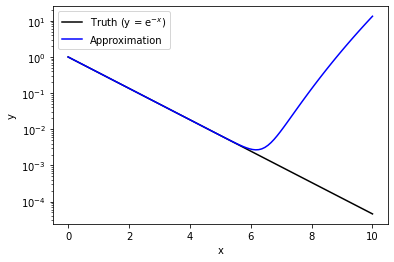

In [74]:
# Note that, if I DO NOT set x= to something else, I still get my original results
test = taylor_expand_exponential(20)

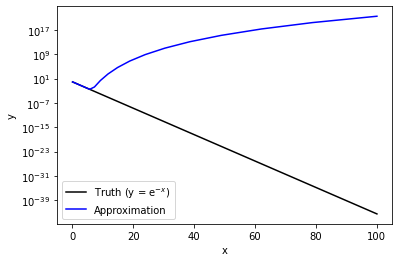

In [75]:
x_new = np.logspace(-1, 2, 30) # set up a new grid with log-spaced bins
test = taylor_expand_exponential(20, x=x_new)
# and we now have a plot on the new grid, which extends to 10^2

When I am plotting, I like to give myself as much flexibility as possible with plotting choices, so I'm not rewriting my plotting tools over and over.

One of my favorite tricks to use is passing any left-over keywords defined by the user to a different function: the ones in charge of plotting!

In this case, the "truth" function will always be plotted in black, but I can customize the appearance of the Taylor approximation using any of the keyword arguments that `plt.plot` can accept.

In [76]:
def taylor_expand_exponential(n, x=XGRID, **kwargs):
    """
    Compute the Taylor expansion approximation to an exponential function, y = exp(-x),
    and plot the approximation against the true function.
    
    Inputs
    ------
    n : int : highest order term to compute in the Taylor expansion
    
    x : numpy array : grid of x values for the function input
    
    **kwargs is passed to plt.plot, which will plot the curve 
        that results from the Taylor expansion
    
    Returns
    -------
    numpy array with the Taylor expansion approximation: 
    y_approx = 1 - x + x^2/2! - x^3/3! + ...
    
    This function also draws a plot.
    """
    y = np.exp(-x)
    
    y_approx = 0.0
    for i in range(n+1): # i takes on values 0, 1, 2, ..., n
        y_approx += (-1.0)**(i) * x**i / np.math.factorial(i)
    
    plt.plot(x, y, color='k', label='Truth (y = e$^{-x}$)')
    # This time, the extra **kwargs are passed to the second plotting command
    plt.plot(x, y_approx, label='Approximation', **kwargs)
    plt.semilogy()
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    return y_approx

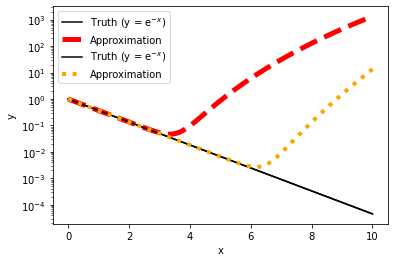

In [77]:
# Now I can compare Taylor expansion curves in the same plot
# But note that the "truth" value gets plotted twice, which messes up my legend!
test10 = taylor_expand_exponential(10, color='r', ls='--', lw=5)
test20 = taylor_expand_exponential(20, color='orange', ls=':', lw=4)

My last trick for writing python functions for plotting is to pass matplotlib objects directly to the function, so you have more flexibility in customizing plots! You can do this by creating a [matplotlib.axes object](https://matplotlib.org/stable/api/axes_api.html) and passing it to the function.

In [78]:
def taylor_expand_exponential(ax, n, x=XGRID, plot_truth=True, **kwargs):
    """
    Compute the Taylor expansion approximation to an exponential function, y = exp(-x),
    and plot the approximation against the true function.
    
    Inputs
    ------
    ax : matplotlib axes object on which to plot
    
    n : int : highest order term to compute in the Taylor expansion
    
    x : numpy array : grid of x values for the function input
    
    plot_truth : bool : If True, plots the true function (exp^-x) in solid black.
    
    **kwargs is passed to plt.plot, which will plot the curve 
        that results from the Taylor expansion
    
    Returns
    -------
    numpy array with the Taylor expansion approximation: 
    y_approx = 1 - x + x^2/2! - x^3/3! + ...
    
    This function also plots the Taylor expansion on `ax`.
    """
    y = np.exp(-x)
    
    y_approx = 0.0
    for i in range(n+1): # i takes on values 0, 1, 2, ..., n
        y_approx += (-1.0)**(i) * x**i / np.math.factorial(i)

    # This time, call the plot commands from the matplotlib axes object
    if plot_truth:
        ax.plot(x, y, color='k', label='Truth (y = e$^{-x}$)')
    ax.plot(x, y_approx, label='n={} Taylor expansion'.format(n), **kwargs)

    # Some of the plot commands need to be modified from previous use
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return y_approx

To showcase why this is useful, I show how to set up two plots side-by-side and use the same function to draw on both axes.

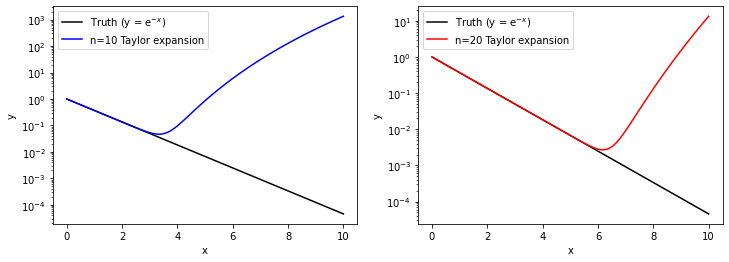

In [81]:
fig = plt.figure(figsize=(12,4)) # Giving the entire plot larger dimensions

ax0 = plt.subplot(121) # First sub-plot
test0 = taylor_expand_exponential(ax0, 10, color='b')

ax1 = plt.subplot(122) # Second sub-plot
test1 = taylor_expand_exponential(ax1, 20, color='r')

or I can draw different curves on the same axes!

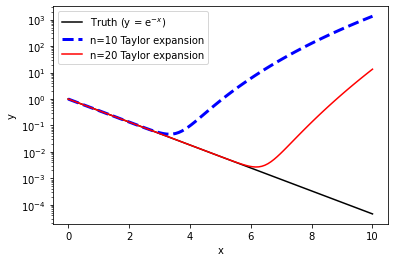

In [82]:
ax = plt.subplot(111)
test0 = taylor_expand_exponential(ax, 10, color='b', ls='--', lw=3)
test1 = taylor_expand_exponential(ax, 20, plot_truth=False, color='r')

# Scripting in Python